In [ ]:
# X --> y1 --> y


# y1 = w01*x + w00 -> X1*[w01 w00].T
# y = w11*y1 + w10 -> 

import numpy as np

def insert1(X):
    m, _ = X.shape
    _1 = np.ones((m,1))
    return np.concatenate((X, _1), axis=1)
# def activation():
    # if X > 0:
    #     return X
    # return 0
def predict(X, W):
    w1, w2 = W[0], W[1]
    X1 = insert1(X)
    y1 = insert1(X1.dot(w1.T).reshape(-1, 1))
    # y1 = activation(y1)
    yp = y1.dot(w2.T)
    return yp

def loss(X, y, W): 
    yp = predict(X, W)
    sqdiff = (y - yp)**2
    return np.mean(sqdiff)

EP = 1e-8

def incrL(f, X, y, W, i, j):
    epm = np.zeros(W.shape)
    epm[i][j] = EP
    W1 = W + epm
    l1 = f(X, y,W1)
    return l1

def diff(f, X, y, W):
    R, C = W.shape
    gradients = np.zeros(W.shape)
    loss = f(X, y, W)
    for i in range(R):
        for j in range(C):
            newloss = incrL(f, X, y, W, i, j)
            g = (newloss - loss)/EP
            gradients[i][j] = g
    return gradients

def fit(X, y, X_test, y_test, epochs=10, eta=0.001, W=None):
    if W is None:
        W = np.random.random((2, 2))
        W[:, 1] = 0
    loss_train = loss(X, y, W)
    loss_test = loss(X_test, y_test, W)
    print(f" - Loss_train: {loss_train}, Loss_test: {loss_test}")

    for epoch in range(epochs):
        grads = diff(loss, X, y, W)
        W = W - eta * grads
        loss_train = loss(X, y, W)
        loss_test = loss(X_test, y_test, W)
        print(f"{epoch} - Loss_train: {loss_train}, Loss_test: {loss_test}")
    return W


In [60]:

def generate_data(m, seed=10):
    np.random.seed(seed)
    x = np.random.randint(-100, 100, size=m)
    y  = 10 * x + 5 + (0.5 - np.random.random(m))
    return x.reshape(-1, 1), y
generate_data(5)

(array([[-91],
        [ 25],
        [-85],
        [-36],
        [ 13]]),
 array([-905.24880388,  255.00149299, -844.72479665, -354.69806286,
         134.73946929]))

In [ ]:
X, y = generate_data(5000, seed=10)
X_test, y_test = generate_data(50, seed=11)
W = fit(X, y,X_test, y_test, 5000, 0.00001)

 - Loss_train: 0.08375882825301191, Loss_test: 0.0817691299827
0 - Loss_train: 0.0837584422231939, Loss_test: 0.08176927661699641
1 - Loss_train: 0.08375805639455063, Loss_test: 0.08176942330460561
2 - Loss_train: 0.08375767076623644, Loss_test: 0.0817695700834703
3 - Loss_train: 0.08375728533833175, Loss_test: 0.08176971689156495
4 - Loss_train: 0.0837569001108802, Loss_test: 0.08176986377978263
5 - Loss_train: 0.08375651508442147, Loss_test: 0.0817700107374031
6 - Loss_train: 0.08375613025749938, Loss_test: 0.08177015773143267
7 - Loss_train: 0.08375574563119606, Loss_test: 0.08177030481829048
8 - Loss_train: 0.08375536120439585, Loss_test: 0.08177045193929175
9 - Loss_train: 0.08375497697755102, Loss_test: 0.08177059914553618
10 - Loss_train: 0.08375459295104362, Loss_test: 0.08177074639401548
11 - Loss_train: 0.08375420912421049, Loss_test: 0.08177089373299755
12 - Loss_train: 0.08375382549692705, Loss_test: 0.08177104111162822
13 - Loss_train: 0.08375344206874731, Loss_test: 0.081

In [68]:
W = fit(X, y,X_test, y_test, 5000, 0.00001, W)

 - Loss_train: 0.09298705633056822, Loss_test: 0.09112561736495997
0 - Loss_train: 0.09298189047956687, Loss_test: 0.09112087560815821
1 - Loss_train: 0.09297672729002042, Loss_test: 0.09111613640464179
2 - Loss_train: 0.09297156677047734, Loss_test: 0.09111139976610998
3 - Loss_train: 0.09296640891764642, Loss_test: 0.09110666568595273
4 - Loss_train: 0.0929612537256161, Loss_test: 0.09110193416001709
5 - Loss_train: 0.09295610120199058, Loss_test: 0.0910972051952098
6 - Loss_train: 0.09295095133946223, Loss_test: 0.09109247878520302
7 - Loss_train: 0.09294580413252156, Loss_test: 0.0910877549234454
8 - Loss_train: 0.09294065958889225, Loss_test: 0.09108303361921843
9 - Loss_train: 0.09293551769847933, Loss_test: 0.09107831486184031
10 - Loss_train: 0.09293037847195969, Loss_test: 0.09107359865816272
11 - Loss_train: 0.09292524189067229, Loss_test: 0.09106888499843308
12 - Loss_train: 0.09292010796818524, Loss_test: 0.09106417388616546
13 - Loss_train: 0.09291497669289864, Loss_test: 

In [78]:
y_perfect  = 10 * X_test.reshape(-1) + 5
# y_test
np.mean((y_perfect - y_test)**2)

0.08247027173989448

In [69]:
W

array([[3.01650666, 1.37502072],
       [3.31511209, 0.42720289]])

In [80]:
y_predict = predict(X_test, W)


In [82]:
y_predict - y_test

array([-0.01121403, -0.08675618,  0.35201396,  0.2226306 ,  0.10616688,
        0.06340828,  0.4485908 ,  0.49043686, -0.15241439, -0.25670109,
        0.30060644, -0.43607872, -0.12938147, -0.42512792, -0.17008284,
       -0.4201537 , -0.20807644,  0.29718975,  0.41296397,  0.29353483,
        0.06992523,  0.12337845, -0.13488865, -0.33006568, -0.05965624,
        0.23760675, -0.42819155, -0.47082121,  0.27370086, -0.19669162,
        0.21137443,  0.2410099 ,  0.44453982, -0.09258294, -0.13759496,
        0.3116875 ,  0.26465809,  0.16173915,  0.31432295,  0.14686056,
        0.46331122, -0.15815478,  0.2494128 ,  0.45027173, -0.16404381,
        0.11987423, -0.13524859, -0.02743525, -0.4210309 , -0.46902144])

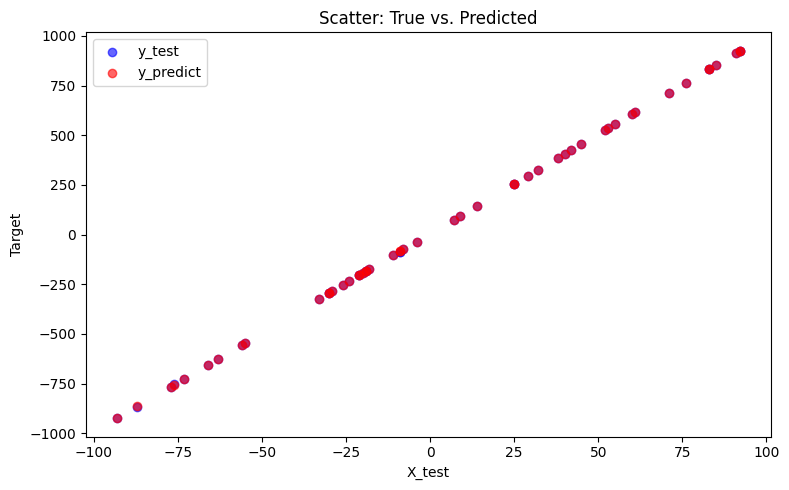

In [81]:
import matplotlib.pyplot as plt

# Assuming X_test, y_test, y_predict are defined

plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='y_test')
plt.scatter(X_test, y_predict, color='red', alpha=0.6, label='y_predict')

plt.xlabel('X_test')
plt.ylabel('Target')
plt.title('Scatter: True vs. Predicted')
plt.legend()
plt.tight_layout()
plt.show()


Question1:

Generate non linear data  - Just like tax slabs. Introduce activation function in predict and then train the model and plot the values.


Question2:

Create a new neural network with n1 neuron in first and n2 neurons in second.
Train and Test on non-linear data


Question3:

Think about how would you optimize the computation of gradients using back propagation.